In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
#read in the data from the xlsx Global_Financial_Development
# file and store it in a dataframe avoid the error Value must be either numerical or a string containing a wildcard
# by specifying the sheet name
df = pd.read_excel("Global_Financial_Development.xlsx", sheet_name="data")

In [59]:
df.head()

,iso3,iso2,imfn,country,region,income,year,gfddai01,gfddai02,gfddai03,...,gfddoi18,gfddoi19,gfddom01,gfddom02,gfddoe01,gfddoe02,ny_gdp_mktp_cd,ny_gdp_pcap_kd,ny_gnp_mktp_cd,sp_pop_totl
0,AFG,AF,512,Afghanistan,South Asia,Low income,1960,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,540000000.0,NaN,550000000.0,9000000.0
1,AFG,AF,512,Afghanistan,South Asia,Low income,1961,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,550000000.0,NaN,560000000.0,9200000.0
2,AFG,AF,512,Afghanistan,South Asia,Low income,1962,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,550000000.0,NaN,560000000.0,9400000.0
3,AFG,AF,512,Afghanistan,South Asia,Low income,1963,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,750000000.0,NaN,770000000.0,9500000.0
4,AFG,AF,512,Afghanistan,South Asia,Low income,1964,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,800000000.0,NaN,820000000.0,9700000.0


In [60]:
df.shape

(12412, 122)

In [61]:
country = df['country']
df = df.drop(['country'], axis=1)

In [62]:
import seaborn as sns
#sns.pairplot(df)

In [63]:
# find and print all non-numeric columns
non_numeric_columns = [col for col in df.columns.values if not df[col].dtype.kind in ['i','f']]
print(non_numeric_columns)

# change these columns to numeric with one-hot encoding
df = pd.get_dummies(df, columns=non_numeric_columns)
df.head()




['iso3', 'iso2', 'region', 'income']


,imfn,year,gfddai01,gfddai02,gfddai03,gfddai04,gfddai05,gfddai06,gfddai07,gfddai08,...,region_Europe & Central Asia,region_Latin America & Caribbean,region_Middle East & North Africa,region_North America,region_South Asia,region_Sub-Saharan Africa,income_High income,income_Low income,income_Lower middle income,income_Upper middle income
0,512,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,True,False,False,True,False,False
1,512,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,True,False,False,True,False,False
2,512,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,True,False,False,True,False,False
3,512,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,True,False,False,True,False,False
4,512,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,True,False,False,True,False,False


In [77]:
df.shape

(12412, 555)

In [64]:
# change NaNs to 0
df = df.fillna(0)


In [65]:
# cluster the data with kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# plot the data
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=labels)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='*', c='#050505', s=1000)
plt.show()

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Figure size 640x480 with 0 Axes>

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

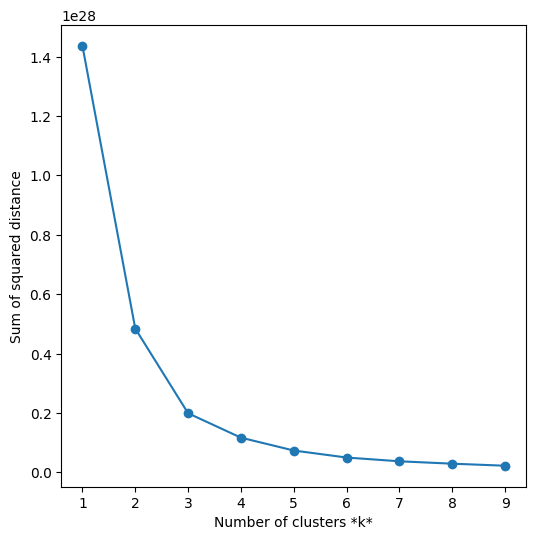

In [66]:
# ellbow method
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [67]:
# plot the clusters
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=5).fit(df)
pca_2d = pca.transform(df)

In [68]:
df_temp=df.copy()
df_temp['country']=country
df_temp["pca1"]=pca_2d[:, 0]
df_temp["pca2"]=pca_2d[:, 1]
df_temp["kmeans"]=kmeans.labels_
df_sample=df_temp

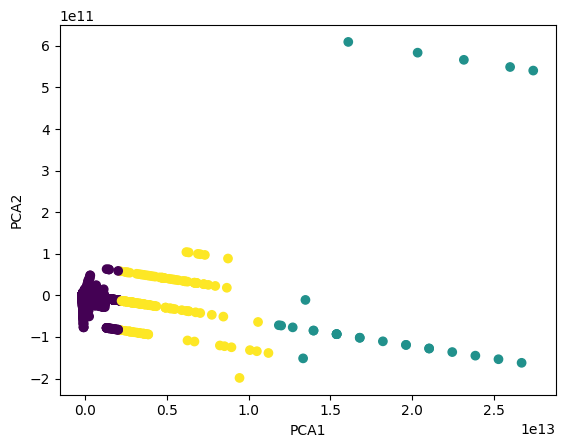

In [69]:
import matplotlib.pyplot as plt

# Plot the data
plt.scatter(df_temp['pca1'], df_temp['pca2'], c=df_temp['kmeans'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
#for i, txt in enumerate(df_sample['country']):
 #   plt.annotate(txt, (df_sample['pca1'].iloc[i],df_sample['pca2'].iloc[i]))
plt.show()


<Axes: >

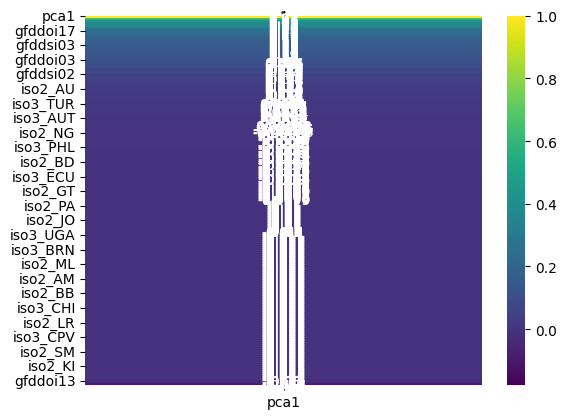

In [70]:
# heatmap with a single column  -> pca1
df_temp=df.copy()
df_temp["pca1"]=pca_2d[:, 0]
df_temp["pca2"]=pca_2d[:, 1]
pca1=df_temp.corr()['pca1'].sort_values(ascending=False)

# plot as heatmap single colum
import seaborn as sns
sns.heatmap(pca1.to_frame(), annot=True, cmap='viridis')

<Axes: >

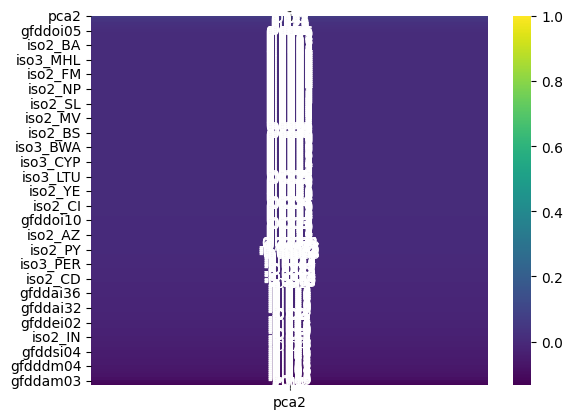

In [71]:
# heatmap with a single column  -> pca1

pca2=df_temp.corr()['pca2'].sort_values(ascending=False)

# plot as heatmap single colum
import seaborn as sns
sns.heatmap(pca2.to_frame(), annot=True, cmap='viridis')

In [72]:
# analysis of the clusters
k_means_df = df.copy()
k_means_df['cluster'] = kmeans.labels_

cluster_means=k_means_df.groupby('cluster').mean()

In [73]:
cluster_means

,imfn,year,gfddai01,gfddai02,gfddai03,gfddai04,gfddai05,gfddai06,gfddai07,gfddai08,...,region_Europe & Central Asia,region_Latin America & Caribbean,region_Middle East & North Africa,region_North America,region_South Asia,region_Sub-Saharan Africa,income_High income,income_Low income,income_Lower middle income,income_Upper middle income
cluster,,,,,,,,,,,,,,,,,,,,,
0,582.362766,1988.244599,56.327740,3.507634,0.694640,0.569214,1.653485,0.664483,0.371425,0.090177,...,0.268740,0.189034,0.099673,0.010393,0.037316,0.227823,0.357610,0.161375,0.222422,0.258592
1,291.666667,2008.666667,4.144944,19.354339,0.937037,0.514815,16.064652,8.990400,3.346670,1.253704,...,0.000000,0.000000,0.000000,0.777778,0.000000,0.000000,0.777778,0.000000,0.000000,0.222222
2,225.466667,2004.115152,76.449884,17.189771,0.618788,0.532121,13.064750,6.101019,1.985222,1.006039,...,0.484848,0.060606,0.000000,0.157576,0.048485,0.000000,0.806061,0.000000,0.048485,0.145455


In [74]:
def cluster_analsysis(cluster_labels, df_to_analyse):
    local_df = df_to_analyse.copy()
    local_df['cluster'] = cluster_labels
    cluster_means=local_df.groupby('cluster').mean()
    for col in cluster_means.columns:
        cluster_means[col] = cluster_means[col]/cluster_means[col].max()
    cluster_means.plot.barh(figsize=(10, 10))
    plt.show()
    
    for i in range(cluster_labels.max() + 1):
        print("Cluster ", i)
        print(customer[cluster_labels == i].head(5))
        print()
    

In [75]:
# analyse with hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=4).fit(df)
agg.labels_

array([2, 2, 2, ..., 2, 2, 2])

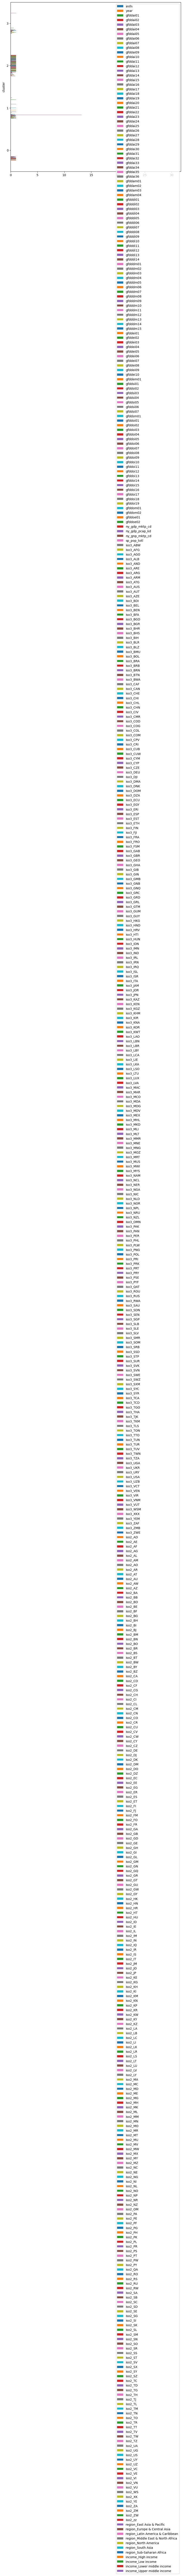

Cluster  0


NameError: name 'customer' is not defined

In [76]:
cluster_analsysis(agg.labels_, df)